<a href="https://colab.research.google.com/github/Ludovico96/Machine_Learning_Asteroids/blob/main/Asteroids_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/Other

Mounted at /content/gdrive/
/content/gdrive/.shortcut-targets-by-id/1uxRfRYpuBQ3ZKq2jJVEMzCCJEkIkfkAc/Other


In [3]:
!pip install --use-deprecated=legacy-resolver pycaret[full]
!pip install pandas-profiling==3.1.0
!pip uninstall -y pyyaml
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 7.0 MB/s 
     |████████████████████████████████| 1.3 MB 51.5 MB/s 
     |████████████████████████████████| 167 kB 60.0 MB/s 
     |████████████████████████████████| 262 kB 59.3 MB/s 
     |████████████████████████████████| 56 kB 5.9 MB/s 
     |████████████████████████████████| 10.4 MB 43.2 MB/s 
     |████████████████████████████████| 17.9 MB 572 kB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 125 kB 59.8 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 6.8 MB 46.2 MB/s 
     |████████████████████████████████| 1.7 MB 54.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
mpl.rcParams['figure.dpi'] = 200
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


DESCRIZIONE DEL DATASET

Caricamento del dataset


In [5]:

df = pd.read_csv("nasa.csv")
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Descrizione del dataset

In [6]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


Informazioni sugli attributi del dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

DESCRIZIONE DELLA DISTRIBUZIONE DEL DATASET

Visualizzazione della distribuzione degli attributi tramite istogrammi

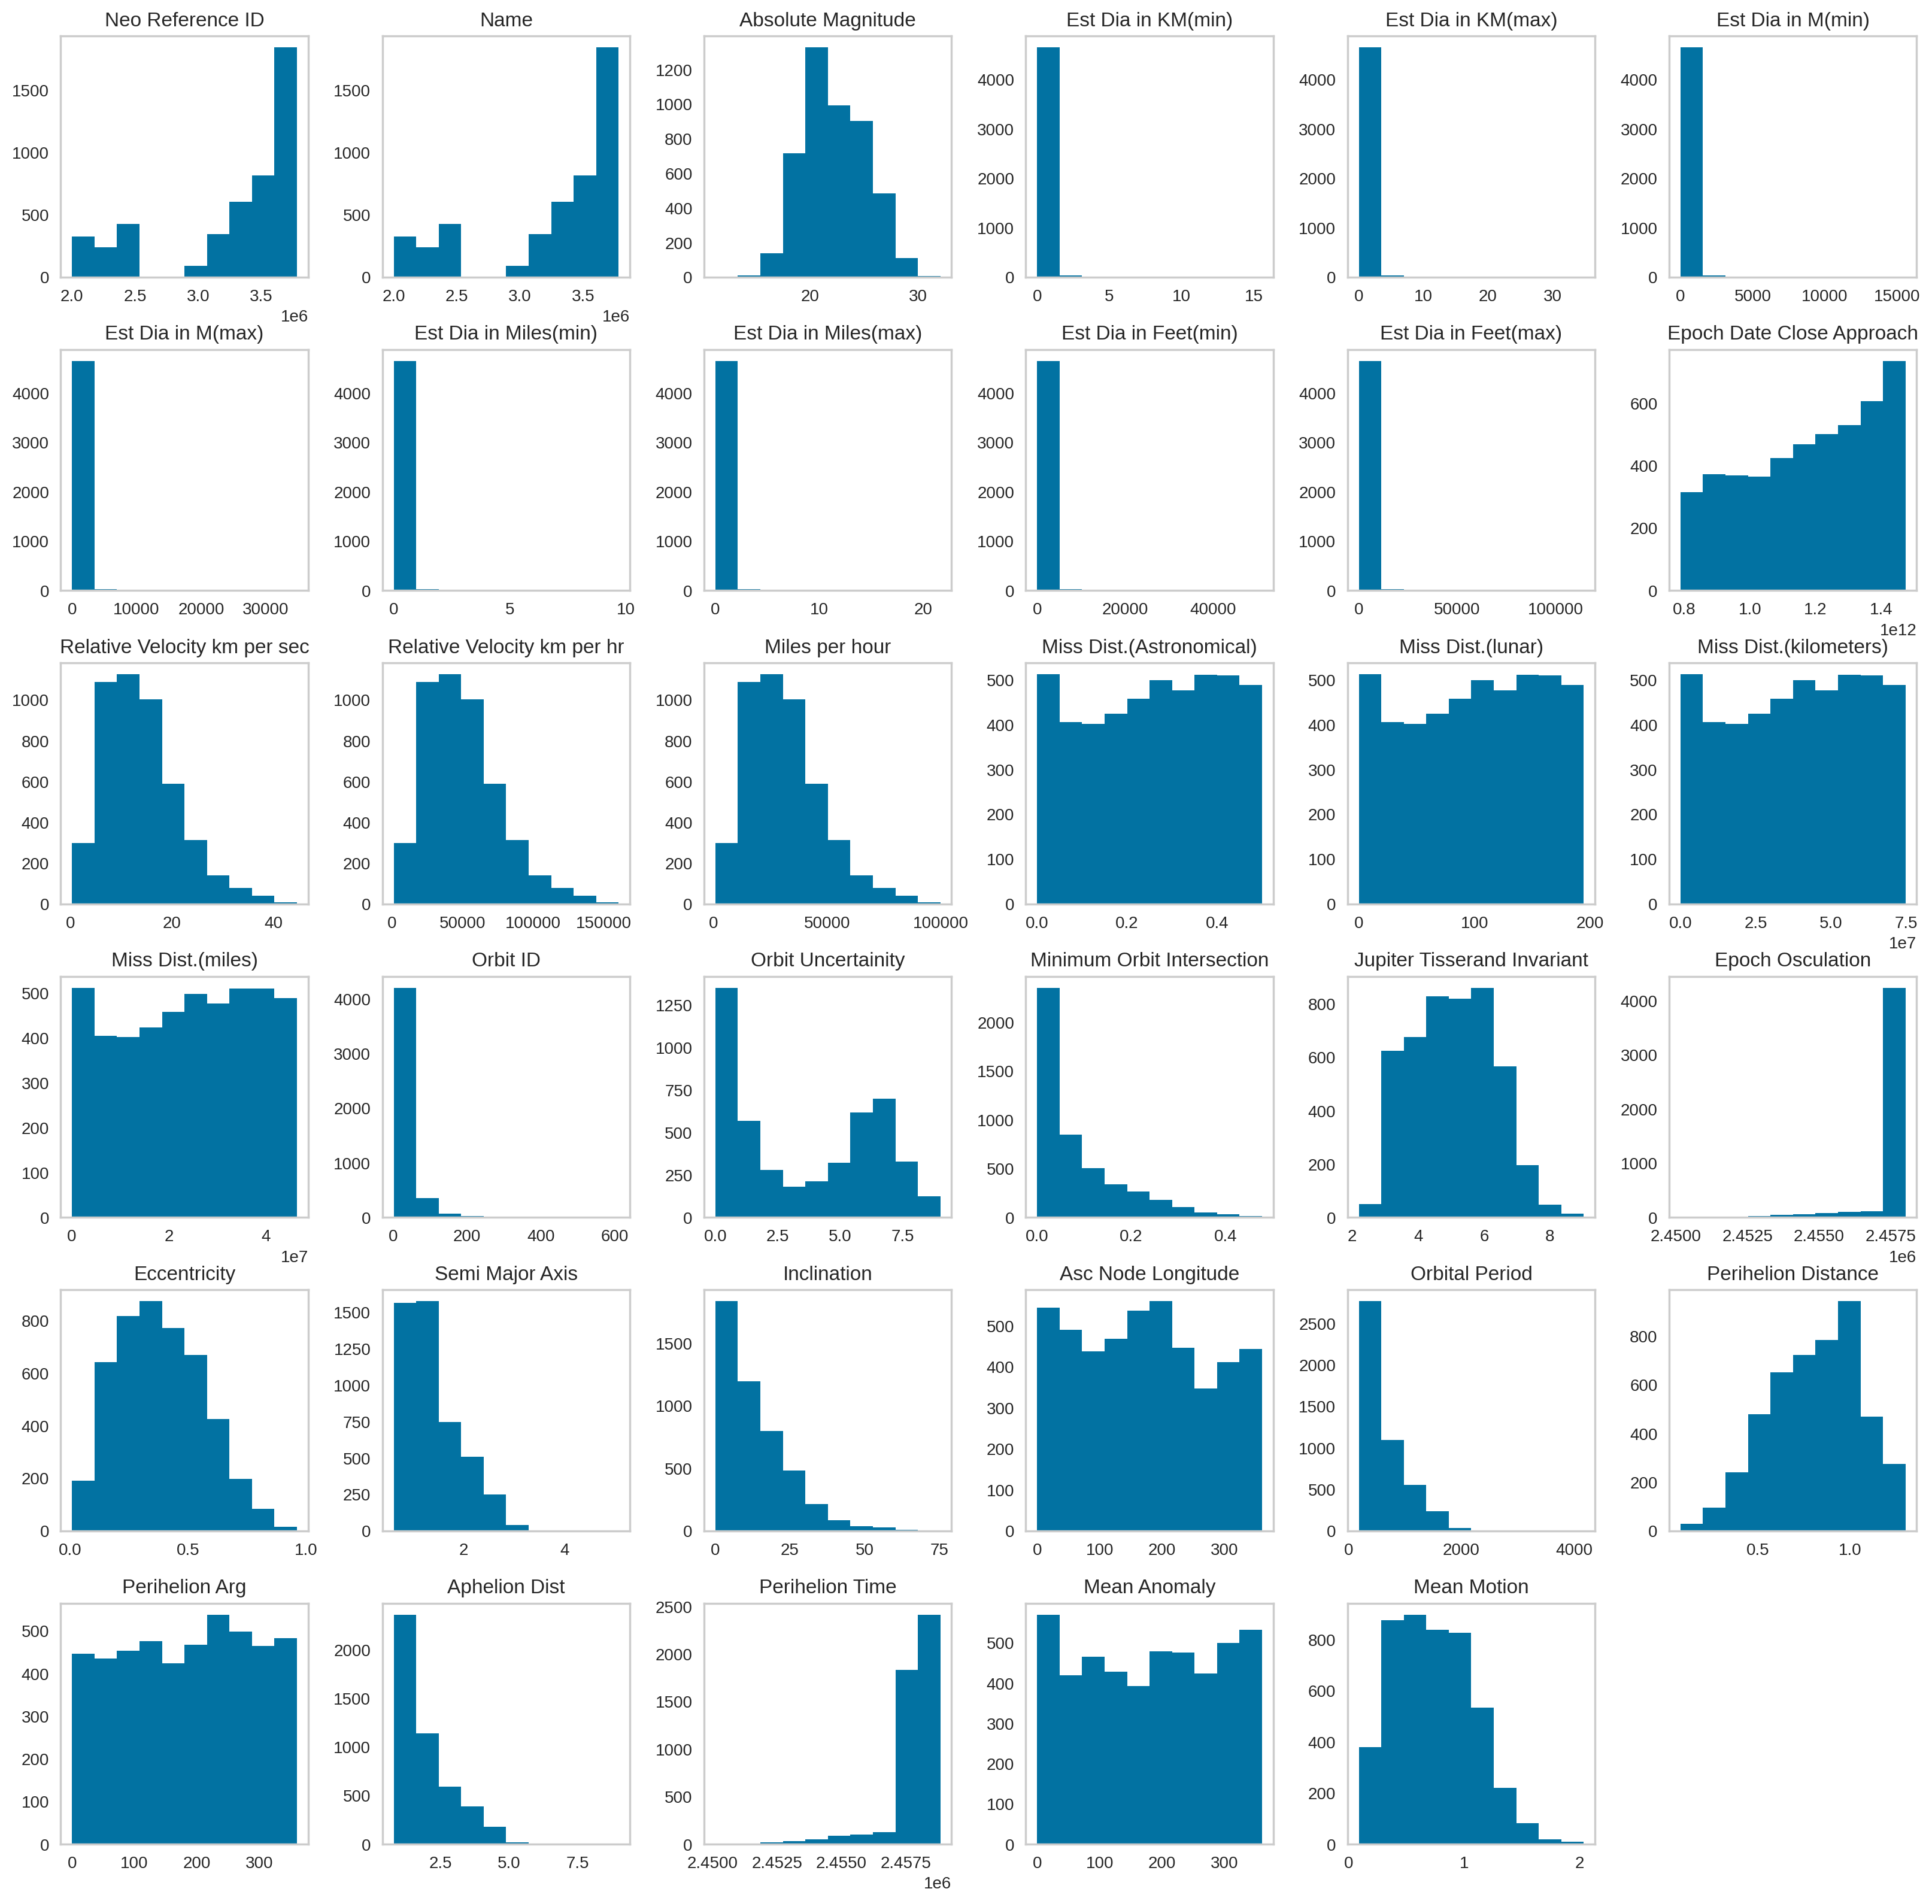

In [8]:
df.hist(bins = 10, figsize = (20,20), grid = False)
plt.show()


PRE-PROCESSING

DATA CLEANING:Per quanto rigurda il data cleaning posso utilizzare uno smoothing filters, o un numeric binning, ma i dati sono già buoni

DATA INTEGRATION:fase in cui integro i dati da differenti fonti e vede se ho attributi ridondanti, in questo caso lo vedo tramite la matrice di correlazione del coefficiente di Pearson per attributi numerici.In questa fase posso eliminare attributi ridondanti

Heatmap che mostra la correlazione tra gli attributi tramite coefficiente di correlazione di Pearson

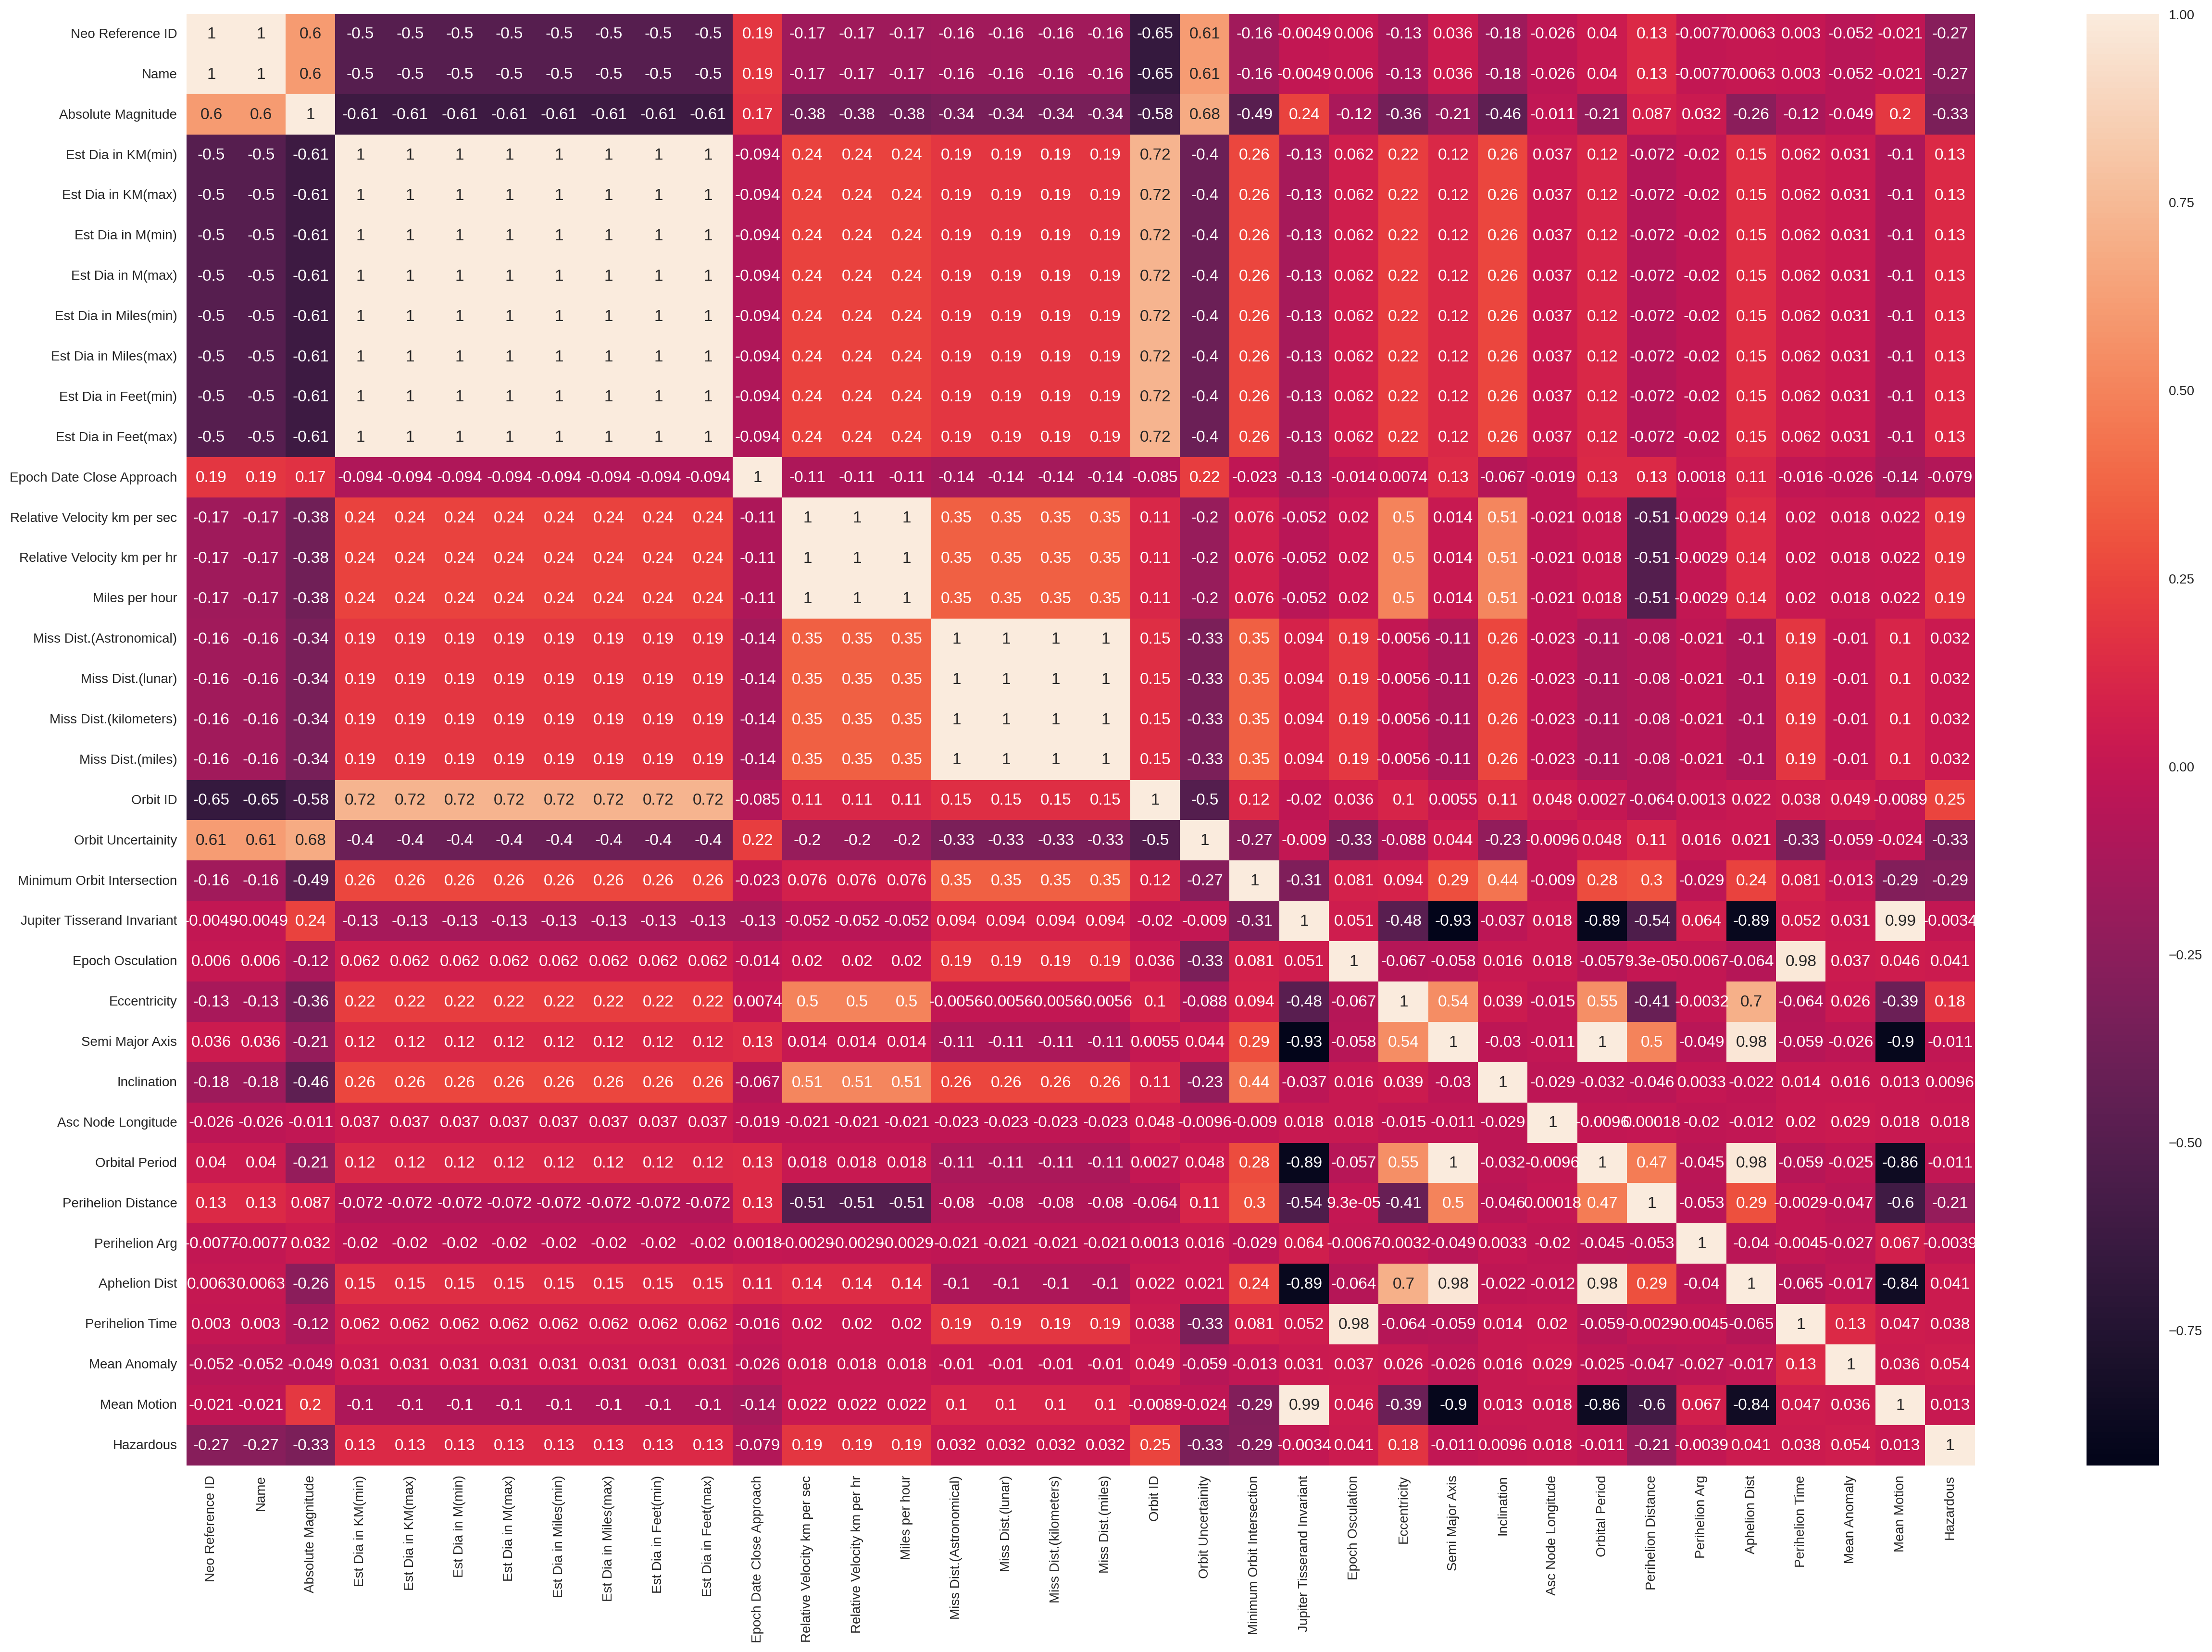

In [9]:
plt.figure(figsize=(30, 20))
sns_pp=sns.heatmap(df.corr(),annot=True)
plt.show()


posso eliminare le colonne che non contribuiscono all'analisi:                              
 
                                       

                                                                                



*   Name 

*   Neo Reference ID 

*   Orbit ID










 gli attributi che hanno un solo                                                                                                                                                        valore:
 







*   Equinox

*    Orbiting Body



 elimino gli attributi che mostrano coefficiente di Pearson pari a 1 rispetto all'attributo Est Dia in KM(min):





*   Est Dia in KM(max)

*   Est Dia in M(min)

*   Est Dia in M(max)
*   Est Dia in Miles(min)


*   Est Dia in Miles(max)


*   Est Dia in Feet(min)

*   Est Dia in Feet(max)
















elimino gli attributi che mostrano coefficiente di Pearson pari a 1 rispetto all'attributo Relative Velocity km per s :

*   Relative Velocity km per hr
*   Miles per hour




elimino gli attributi che mostrano coefficiente di Pearson pari a 1 rispetto all'attributo Miss Dist.(Astronomic):

*   Miss Dist.(lunar)

*   Miss Dist.(kilometers)
*   Miss Dist.(miles)




In [10]:
del_columns1=["Name","Neo Reference ID", "Equinox", "Orbit ID", "Orbiting Body","Close Approach Date","Orbit Determination Date"]

DATA REDUCTION:posso sfruttare una PCA, o una feature selection. La PCA sembra abbassare molto l'accuratezza degli algoritmi, la feature selection sembra mantenere le prestazioni simili.L'opzione remove_collinearity sfrutta l'heuristic approach per la feature selection.Un altro tipo di dimensionality reduction lo sfrutto tramite il decision tree. Per quanto riguarda la numerosity reduction potrei applicare uno stratified sampling ma  il dataset non è grosso

DATA TRANSFORMATION:applico la normalizzazione Z-score per evitare il problema degli outliers, e perchè aumenta l'accuratezza degli algoritmi come KNN e Naive Bayes

DATA DISCRETIZATION: l'algoritmo del decision tree implementa una discretizzazione

Tramite la funzione setup mostro i vari metodi di ottimizzazione che possono essere applicati al dataset

In [76]:


clf1 = setup( df, target = 'Hazardous',
             
           remove_perfect_collinearity=True,
             ignore_features = del_columns1,
             remove_multicollinearity=True,
             fix_imbalance = True,
              normalize = True
             
             
             
)



,Description,Value
0,session_id,7790
1,Target,Hazardous
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(4687, 40)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


Fa vedere le metriche che andiamo a considerare

In [12]:
get_metrics()
remove_metric('Kappa')
remove_metric('mcc')

CLASSIFICATION

Decision Tree Model

Ogni modello è creato con una 10 cross validation

In [13]:
dt =create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9808,0.9615,1.0000,0.9804
1,0.9939,0.9808,0.9615,1.0000,0.9804
2,0.9939,0.9964,1.0000,0.9623,0.9808
3,0.9909,0.9866,0.9804,0.9615,0.9709
4,0.9909,0.9946,1.0000,0.9444,0.9714
5,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9970,0.9982,1.0000,0.9808,0.9903


descrizione dei parametri del decision tree

In [14]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6388, splitter='best')

valuta il modello del decision tree tramite grafici come AUC, confusion matrix, feature selection 

In [15]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Tramite tune_model ottimizzo il decision tree, per es. facendo un pruning posso settare una max depth dell'albero decisionale e inoltre tramite choose_better posso far ritornare il modello iniziale se le 
performance non vengono aumentate

In [16]:
tuned_dt=tune_model(dt,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9816,0.9615,1.0000,0.9804
1,0.9970,0.9946,0.9808,1.0000,0.9903
2,0.9939,0.9964,1.0000,0.9623,0.9808
3,0.9939,0.9964,1.0000,0.9623,0.9808
4,0.9909,0.9946,1.0000,0.9444,0.9714
5,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9970,0.9982,1.0000,0.9808,0.9903
7,0.9878,0.9878,0.9608,0.9608,0.9608
8,0.9970,0.9982,1.0000,0.9808,0.9903


In [17]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6388, splitter='best')

In [18]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

posso settare un max depth dell'albero decisionale

In [77]:
dt1=create_model('dt',max_depth=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9909,0.9963,0.9808,0.9623,0.9714,0.9660,0.9660
1,0.9909,0.9963,1.0000,0.9455,0.9720,0.9665,0.9670
2,0.9939,0.9981,0.9808,0.9808,0.9808,0.9771,0.9771
3,0.9970,1.0000,1.0000,0.9811,0.9905,0.9887,0.9887
4,0.9970,0.9999,0.9811,1.0000,0.9905,0.9887,0.9887
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9970,0.9982,1.0000,0.9815,0.9907,0.9888,0.9889
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


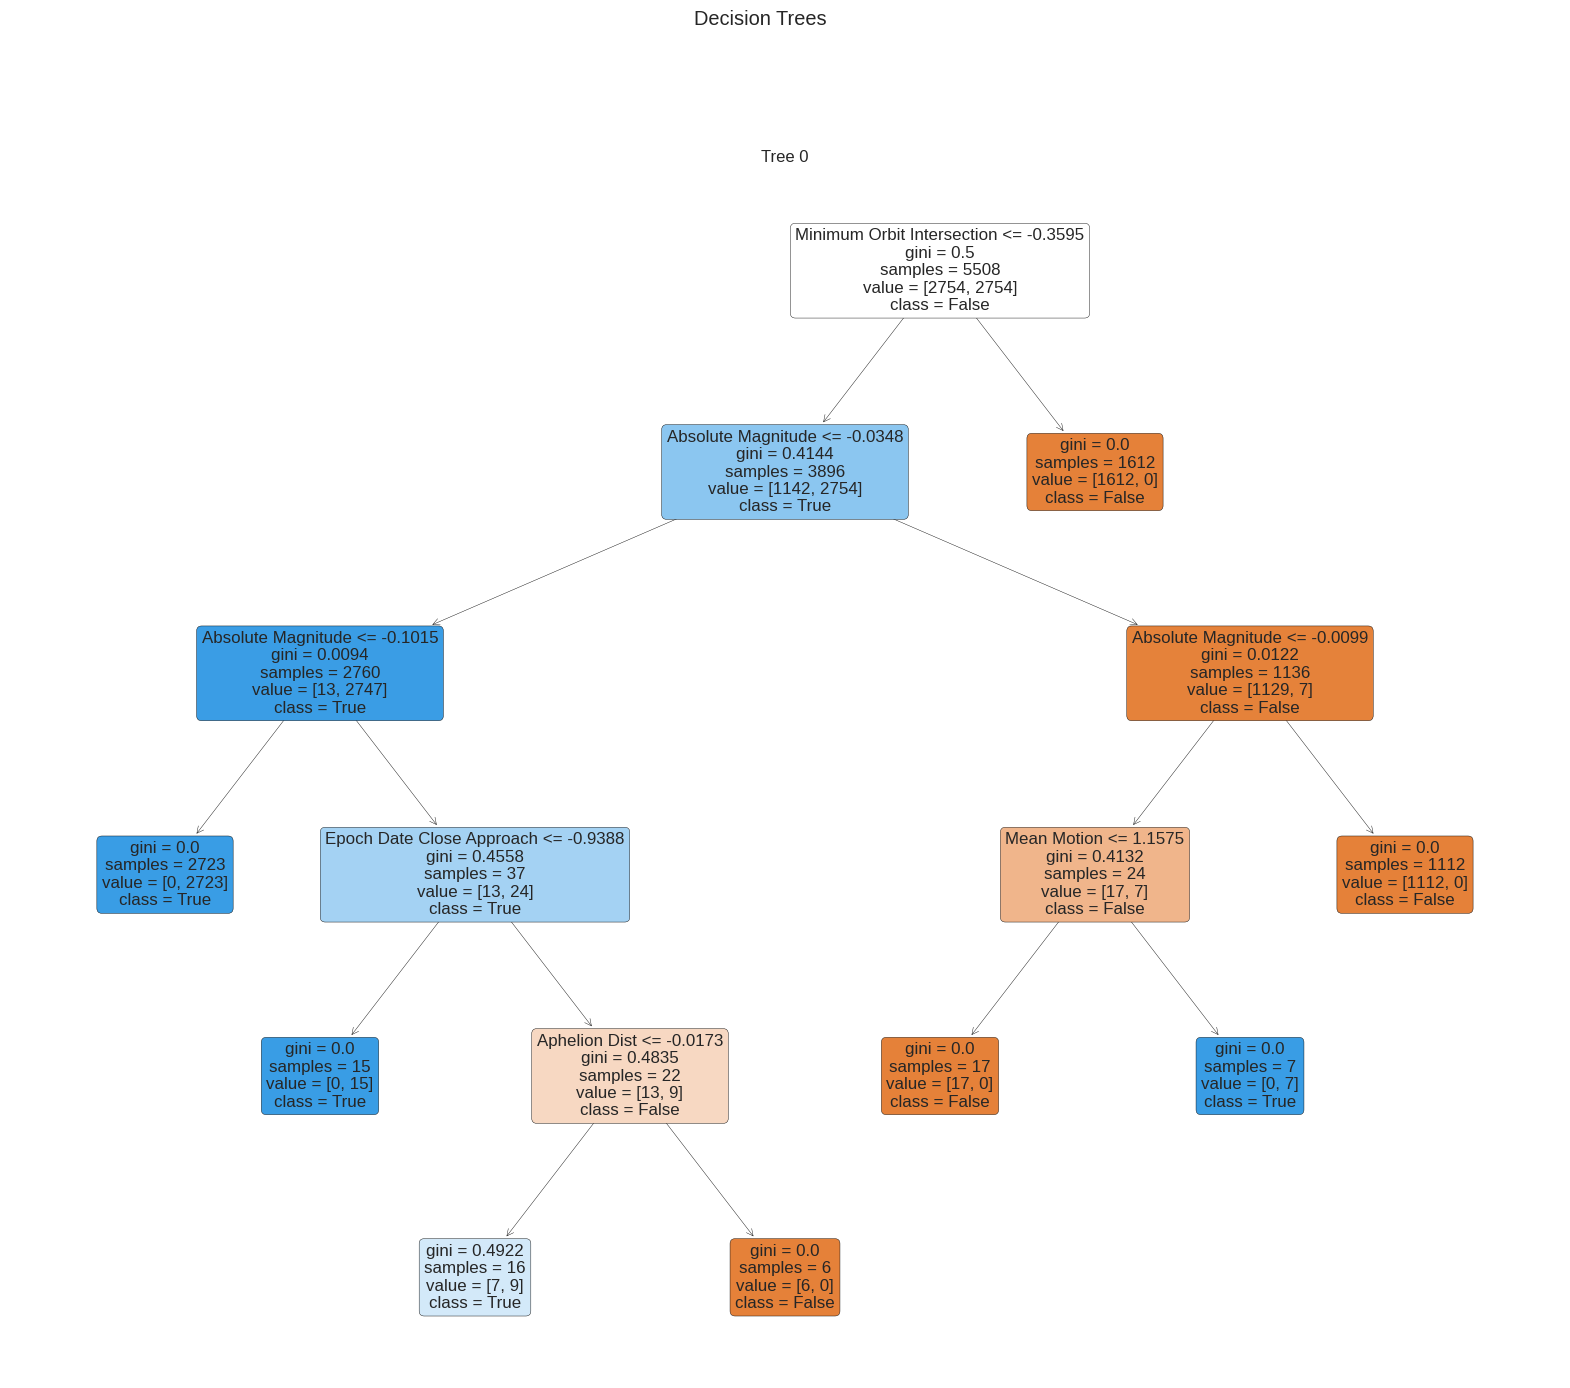

In [84]:
plot_model(dt1,plot="tree")

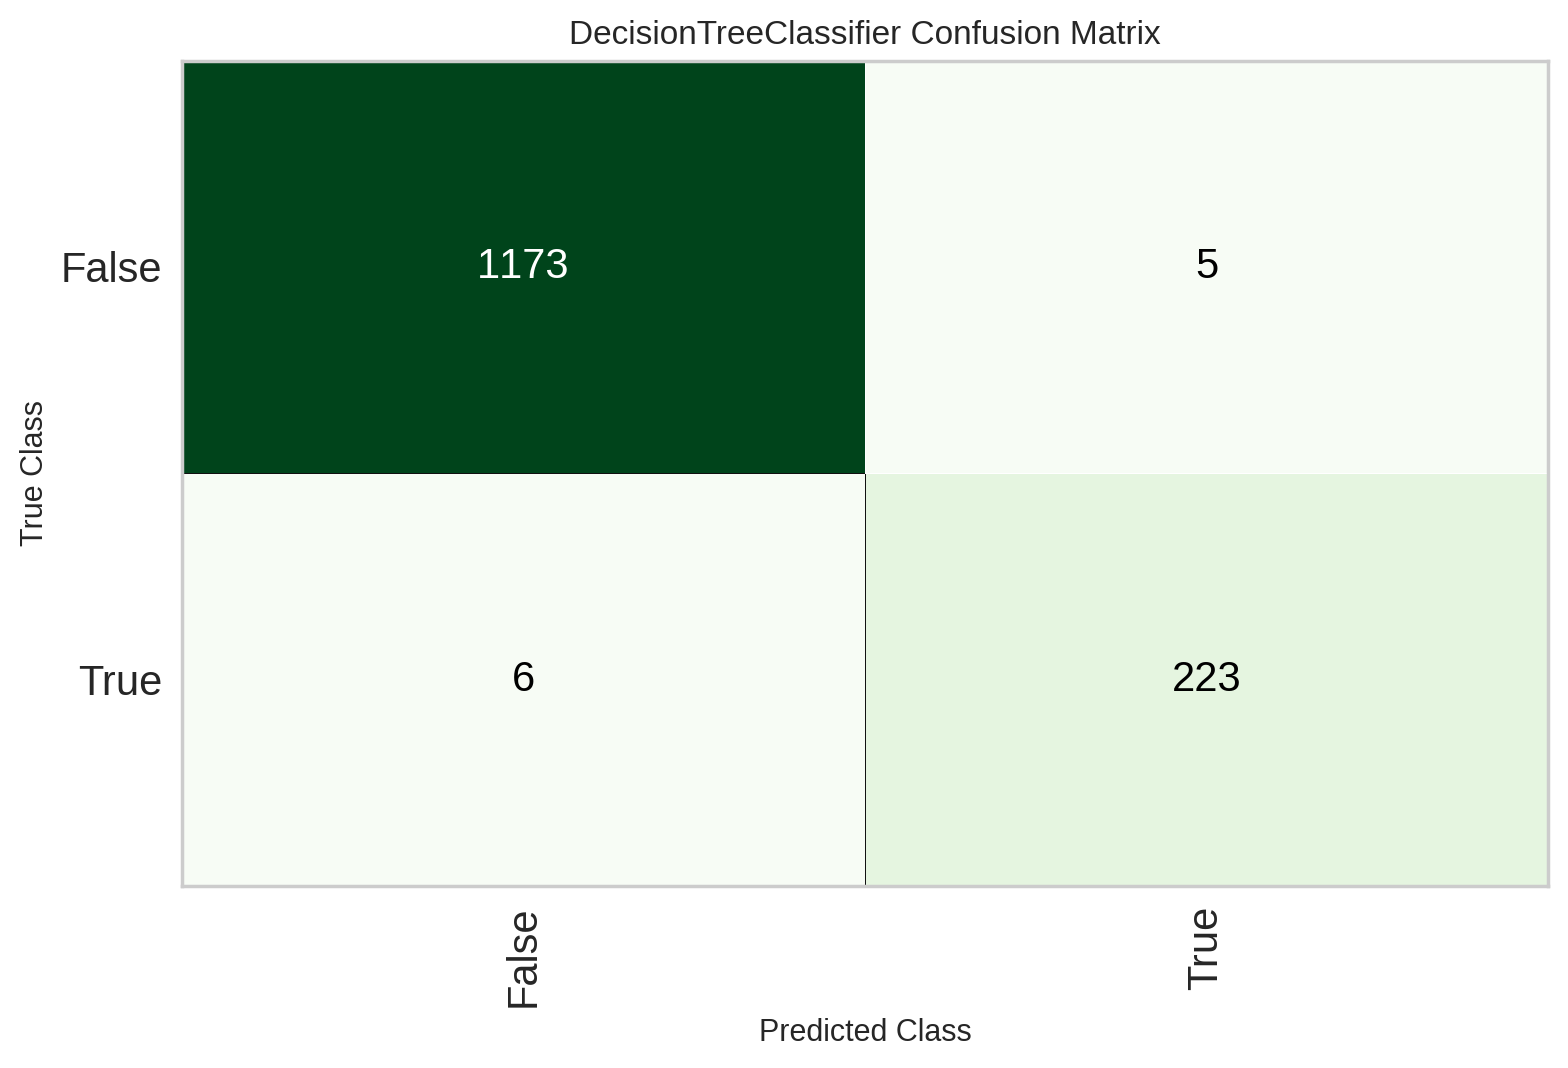

In [81]:
plot_model(dt1,plot="confusion_matrix")

ensemble_method che aumentano le prestazioni

In [21]:
bagged_dt = ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9902,0.9615,1.0000,0.9804
1,0.9939,0.9903,0.9615,1.0000,0.9804
2,0.9970,1.0000,1.0000,0.9808,0.9903
3,0.9909,0.9997,0.9608,0.9800,0.9703
4,0.9970,0.9982,1.0000,0.9808,0.9903
5,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9970,0.9982,1.0000,0.9808,0.9903
7,0.9878,0.9996,0.9412,0.9796,0.9600
8,1.0000,1.0000,1.0000,1.0000,1.0000


In [22]:
bagged_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9970,0.9904,0.9808,1.0000,0.9903
1,0.9939,0.9808,0.9615,1.0000,0.9804
2,0.9970,0.9982,1.0000,0.9808,0.9903
3,0.9878,0.9768,0.9608,0.9608,0.9608
4,0.9878,0.9848,0.9804,0.9434,0.9615
5,0.9970,0.9902,0.9804,1.0000,0.9901
6,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9909,0.9706,0.9412,1.0000,0.9697
8,0.9909,0.9866,0.9804,0.9615,0.9709


Tramite optimize posso ottimmizzare la metrica che voglio

In [23]:
bagged_tuned_dt = ensemble_model(tuned_dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9902,0.9615,1.0000,0.9804
1,0.9939,0.9903,0.9615,1.0000,0.9804
2,0.9970,1.0000,1.0000,0.9808,0.9903
3,0.9909,0.9997,0.9608,0.9800,0.9703
4,0.9970,0.9982,1.0000,0.9808,0.9903
5,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9970,0.9982,1.0000,0.9808,0.9903
7,0.9878,0.9996,0.9412,0.9796,0.9600
8,1.0000,1.0000,1.0000,1.0000,1.0000


In [78]:
tuned_dt1=tune_model(dt1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9909,0.9923,0.9808,0.9623,0.9714,0.9660,0.9660
1,0.9970,0.9982,1.0000,0.9811,0.9905,0.9887,0.9887
2,0.9939,0.9964,1.0000,0.9630,0.9811,0.9775,0.9777
3,0.9909,0.9946,1.0000,0.9455,0.9720,0.9665,0.9670
4,0.9878,0.9910,0.9811,0.9455,0.9630,0.9557,0.9559
5,0.9970,0.9962,0.9811,1.0000,0.9905,0.9887,0.9887
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9939,0.9941,0.9811,0.9811,0.9811,0.9775,0.9775
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


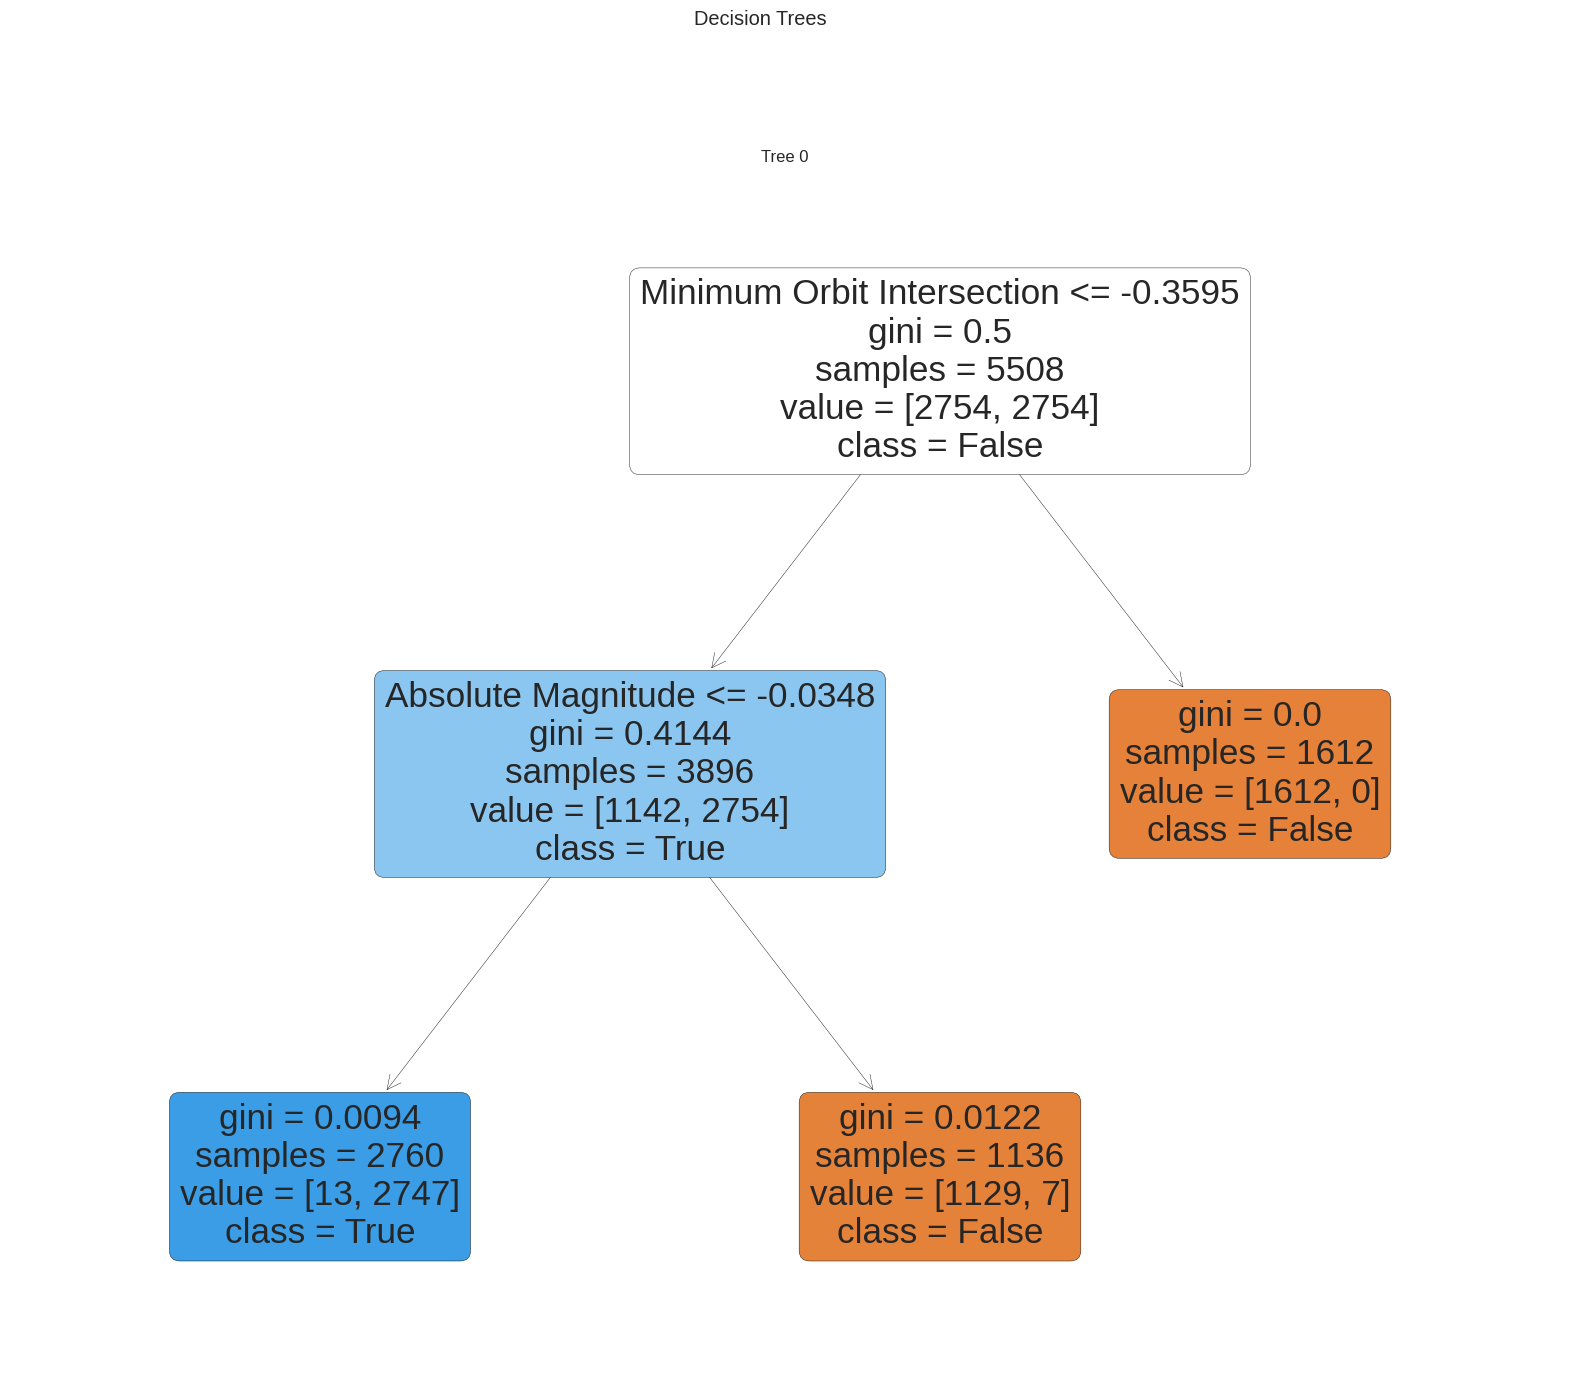

In [79]:
plot_model(tuned_dt1,plot="tree")

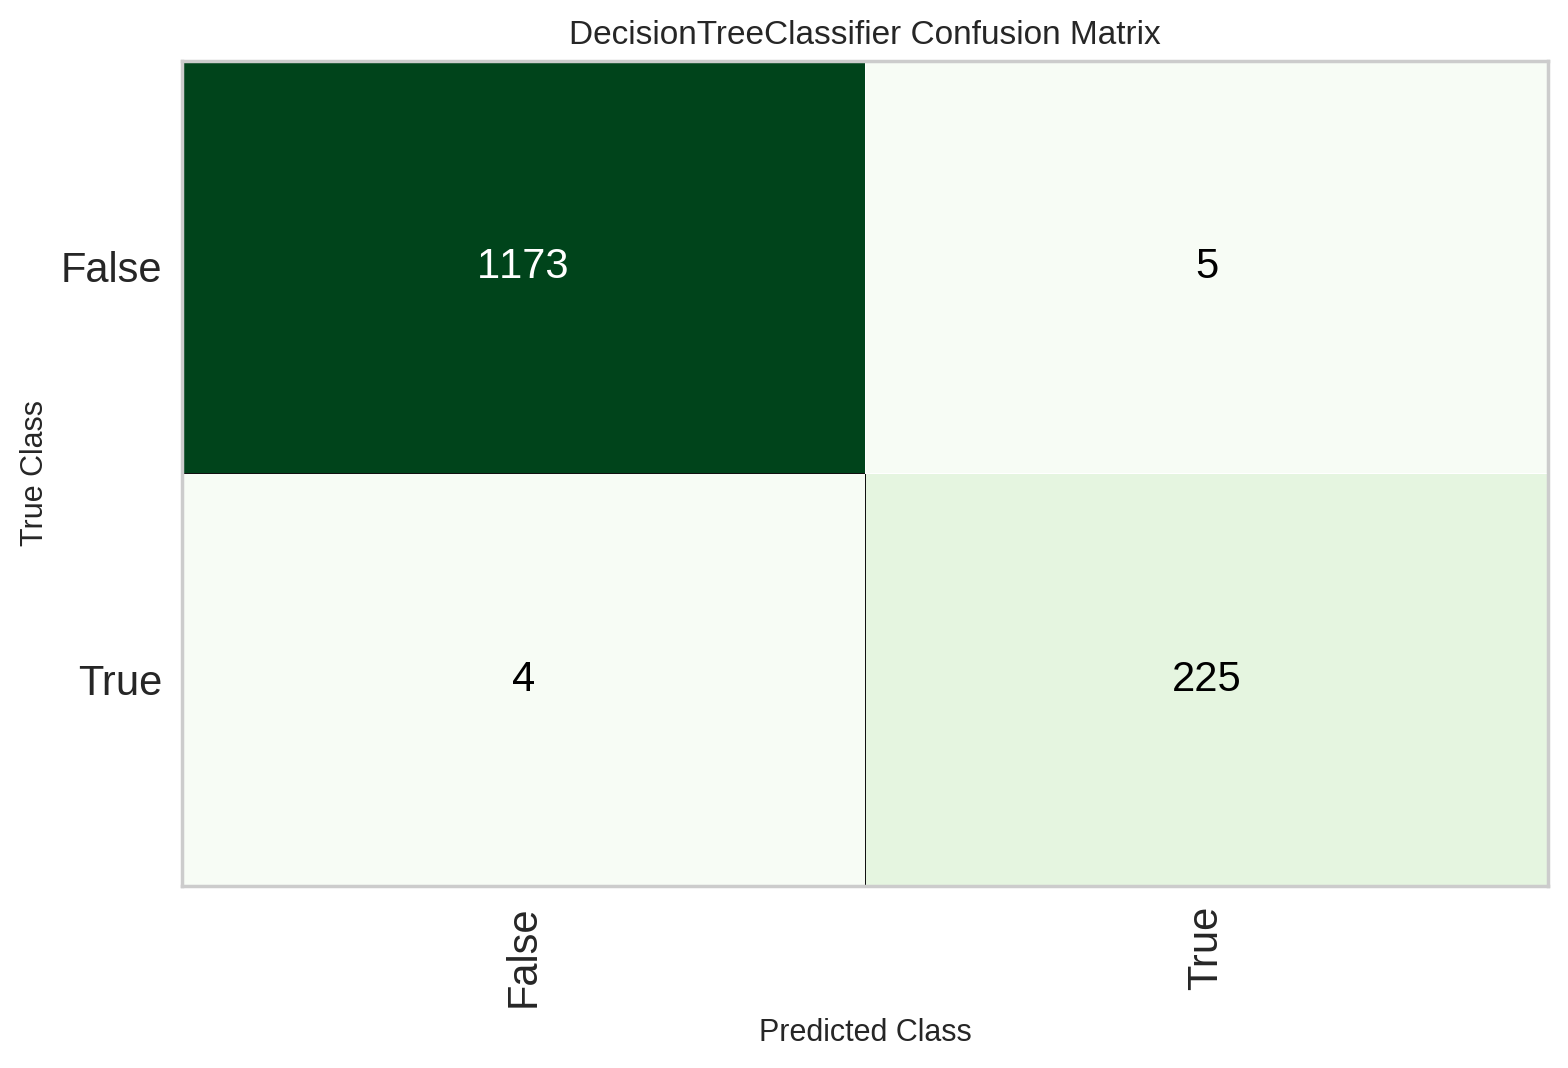

In [82]:
plot_model(tuned_dt1,plot="confusion_matrix")

In [26]:
bagged_tuned_dt1 = ensemble_model(tuned_dt1, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9956,0.9615,1.0000,0.9804
1,0.9970,0.9962,0.9808,1.0000,0.9903
2,0.9939,0.9964,1.0000,0.9623,0.9808
3,0.9939,0.9964,1.0000,0.9623,0.9808
4,0.9909,0.9963,1.0000,0.9444,0.9714
5,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9970,0.9982,1.0000,0.9808,0.9903
7,0.9878,0.9878,0.9608,0.9608,0.9608
8,0.9970,0.9982,1.0000,0.9808,0.9903


In [27]:
print(convert_model(tuned_dt1,language='java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[3] <= -0.3535131812095642) {
            if (input[0] <= -0.050020940601825714) {
                var0 = new double[] {0.004329004329004329, 0.9956709956709957};
            } else {
                var0 = new double[] {0.9932829554995802, 0.006717044500419815};
            }
        } else {
            var0 = new double[] {1.0, 0.0};
        }
        return var0;
    }
}



Per fare il pruning del decision tree posso anche cambiare il valore del parametro ccp_alpha known as the complexity parameter o settare una max_depth.Poso utilizzare l'opzione return_train_score=True per visualizzare over-fitting, naturalmente il tune_model è quello che presenta meno overfitting

l'algoritmo del decision tree per attributi con valori continui splitta direttamente gli attributi in intervalli, per es. per il primo attributo 'Minimum Orbit Intersection' se considero valori <=x mi sposto verso sinistra verso l'attributo 'Absolute Magnitude' in cui ho un gini index diverso da zero e si va a formare un nodo senza partizione pura dove devo ancora splittare gli attributi, mentre se considero valori >x mi sposto verso destra dove ho un gini index pari a zero e quindi una partizione pura con 1566 samples che appartengono alla classe false e quindi si va a formare un leaf node dove non c'è più bisogno di splittare. Lo splitting qui è binario viene preso il valore che minimizza il Gini impurity. 

Valutazione dei due modelli

Naive Bayes classificator

In [28]:
nb = create_model('nb')


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9085,0.9681,0.9231,0.6486,0.7619
1,0.8659,0.9309,0.7885,0.5541,0.6508
2,0.8841,0.9467,0.8627,0.5867,0.6984
3,0.8445,0.9216,0.7451,0.5000,0.5984
4,0.8902,0.9251,0.8824,0.6000,0.7143
5,0.9207,0.9812,0.9020,0.6866,0.7797
6,0.9116,0.9658,0.8824,0.6618,0.7563
7,0.8689,0.9283,0.8431,0.5513,0.6667
8,0.8780,0.9553,0.8824,0.5696,0.6923


In [29]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
bagged_nb = ensemble_model(nb, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9055,0.9718,0.9231,0.6400,0.7559
1,0.8628,0.9452,0.7885,0.5467,0.6457
2,0.8841,0.9449,0.8824,0.5844,0.7031
3,0.8445,0.9250,0.7451,0.5000,0.5984
4,0.8872,0.9263,0.8824,0.5921,0.7087
5,0.9177,0.9824,0.9020,0.6765,0.7731
6,0.9085,0.9692,0.8824,0.6522,0.7500
7,0.8659,0.9308,0.8431,0.5443,0.6615
8,0.8780,0.9546,0.8824,0.5696,0.6923


In [31]:
boosting_nb = ensemble_model(nb, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.6982,0.6629,0.0385,0.0392,0.0388
1,0.7744,0.6661,0.0385,0.0769,0.0513
2,0.8110,0.8259,0.7255,0.4353,0.5441
3,0.7195,0.6697,0.3922,0.2469,0.3030
4,0.6555,0.6568,0.5294,0.2328,0.3234
5,0.7134,0.7184,0.5882,0.2913,0.3896
6,0.8201,0.8360,0.6471,0.4459,0.5280
7,0.4573,0.6754,0.8235,0.1991,0.3206
8,0.7317,0.5997,0.0588,0.0698,0.0638


In [32]:
tuned_nb=tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9085,0.9681,0.9231,0.6486,0.7619
1,0.8659,0.9309,0.7885,0.5541,0.6508
2,0.8841,0.9467,0.8627,0.5867,0.6984
3,0.8445,0.9216,0.7451,0.5000,0.5984
4,0.8902,0.9251,0.8824,0.6000,0.7143
5,0.9207,0.9812,0.9020,0.6866,0.7797
6,0.9116,0.9658,0.8824,0.6618,0.7563
7,0.8689,0.9283,0.8431,0.5513,0.6667
8,0.8780,0.9553,0.8824,0.5696,0.6923


Il tuned model del Naive Bayes fa variare il var_smoothing che corrisponde al Laplacian correction per evitare casi di zero probability e vediamo che la situazione migliora enormemente 

In [33]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
bagged_tuned_nb = ensemble_model(tuned_nb, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9055,0.9718,0.9231,0.6400,0.7559
1,0.8628,0.9452,0.7885,0.5467,0.6457
2,0.8841,0.9449,0.8824,0.5844,0.7031
3,0.8445,0.9250,0.7451,0.5000,0.5984
4,0.8872,0.9263,0.8824,0.5921,0.7087
5,0.9177,0.9824,0.9020,0.6765,0.7731
6,0.9085,0.9692,0.8824,0.6522,0.7500
7,0.8659,0.9308,0.8431,0.5443,0.6615
8,0.8780,0.9546,0.8824,0.5696,0.6923


In [35]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

K-Nearest Neighbours Classifier

In [37]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8262,0.9247,0.9038,0.4747,0.6225
1,0.8293,0.9139,0.8846,0.4792,0.6216
2,0.8628,0.9410,0.8824,0.5357,0.6667
3,0.8262,0.8893,0.8039,0.4659,0.5899
4,0.8384,0.9221,0.8824,0.4891,0.6294
5,0.8902,0.9478,0.9216,0.5949,0.7231
6,0.8689,0.9460,0.9412,0.5455,0.6906
7,0.8811,0.9356,0.8824,0.5769,0.6977
8,0.8415,0.9220,0.9216,0.4947,0.6438


In [38]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
bagged_knn = ensemble_model(knn, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8323,0.9364,0.8846,0.4842,0.6259
1,0.8293,0.9275,0.8654,0.4787,0.6164
2,0.8628,0.9511,0.9020,0.5349,0.6715
3,0.8262,0.9020,0.7843,0.4651,0.5839
4,0.8415,0.9328,0.9412,0.4948,0.6486
5,0.8933,0.9575,0.9412,0.6000,0.7328
6,0.8628,0.9486,0.9216,0.5341,0.6763
7,0.8750,0.9537,0.8824,0.5625,0.6870
8,0.8445,0.9384,0.9216,0.5000,0.6483


In [40]:
weighted_knn = create_model('knn',weights='distance')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8323,0.9313,0.9038,0.4845,0.6309
1,0.8354,0.9190,0.8846,0.4894,0.6301
2,0.8720,0.9435,0.8824,0.5556,0.6818
3,0.8354,0.8913,0.8039,0.4824,0.6029
4,0.8445,0.9253,0.8824,0.5000,0.6383
5,0.8994,0.9540,0.9216,0.6184,0.7402
6,0.8780,0.9493,0.9412,0.5647,0.7059
7,0.8811,0.9403,0.8824,0.5769,0.6977
8,0.8567,0.9240,0.9216,0.5222,0.6667


In [41]:
bagged_weighted_knn = ensemble_model(weighted_knn, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8445,0.9392,0.8846,0.5055,0.6434
1,0.8354,0.9293,0.8654,0.4891,0.6250
2,0.8720,0.9531,0.8824,0.5556,0.6818
3,0.8262,0.9045,0.7843,0.4651,0.5839
4,0.8384,0.9346,0.9020,0.4894,0.6345
5,0.8994,0.9613,0.9412,0.6154,0.7442
6,0.8659,0.9508,0.9020,0.5412,0.6765
7,0.8811,0.9560,0.8824,0.5769,0.6977
8,0.8476,0.9397,0.9216,0.5054,0.6528


In [42]:
tuned_knn=tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8933,0.9387,0.9038,0.6104,0.7287
1,0.8963,0.9304,0.8654,0.6250,0.7258
2,0.8841,0.9311,0.8235,0.5915,0.6885
3,0.8659,0.8962,0.7647,0.5493,0.6393
4,0.9085,0.9432,0.9020,0.6479,0.7541
5,0.9146,0.9661,0.8235,0.6885,0.7500
6,0.9207,0.9711,0.8431,0.7049,0.7679
7,0.9024,0.9234,0.8431,0.6418,0.7288
8,0.8780,0.9182,0.8431,0.5733,0.6825


In [43]:
bagged_tuned_knn = ensemble_model(tuned_knn, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8872,0.9512,0.9231,0.5926,0.7218
1,0.8780,0.9465,0.9038,0.5732,0.7015
2,0.8628,0.9503,0.8235,0.5385,0.6512
3,0.8598,0.9202,0.8235,0.5316,0.6462
4,0.8689,0.9472,0.9216,0.5465,0.6861
5,0.9177,0.9711,0.9216,0.6714,0.7769
6,0.9146,0.9756,0.9216,0.6620,0.7705
7,0.8720,0.9428,0.8824,0.5556,0.6818
8,0.8567,0.9349,0.8627,0.5238,0.6519


In [44]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [45]:
weigheted_tuned_knn=tune_model(weighted_knn, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8933,0.9387,0.9038,0.6104,0.7287
1,0.8963,0.9304,0.8654,0.6250,0.7258
2,0.8841,0.9311,0.8235,0.5915,0.6885
3,0.8659,0.8962,0.7647,0.5493,0.6393
4,0.9085,0.9432,0.9020,0.6479,0.7541
5,0.9146,0.9661,0.8235,0.6885,0.7500
6,0.9207,0.9711,0.8431,0.7049,0.7679
7,0.9024,0.9234,0.8431,0.6418,0.7288
8,0.8780,0.9182,0.8431,0.5733,0.6825


In [46]:
bagged_weighted_tuned_knn = ensemble_model(weigheted_tuned_knn, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8872,0.9512,0.9231,0.5926,0.7218
1,0.8780,0.9465,0.9038,0.5732,0.7015
2,0.8628,0.9503,0.8235,0.5385,0.6512
3,0.8598,0.9202,0.8235,0.5316,0.6462
4,0.8689,0.9472,0.9216,0.5465,0.6861
5,0.9177,0.9711,0.9216,0.6714,0.7769
6,0.9146,0.9756,0.9216,0.6620,0.7705
7,0.8720,0.9428,0.8824,0.5556,0.6818
8,0.8567,0.9349,0.8627,0.5238,0.6519


In [47]:
weigheted_tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [48]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
evaluate_model(weigheted_tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

AdaBoost Classifier

In [50]:
adaBoost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9928,0.9615,1.0000,0.9804
1,0.9970,0.9994,0.9808,1.0000,0.9903
2,0.9970,1.0000,1.0000,0.9808,0.9903
3,0.9909,0.9999,0.9804,0.9615,0.9709
4,0.9939,0.9995,1.0000,0.9623,0.9808
5,0.9970,1.0000,0.9804,1.0000,0.9901
6,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9878,0.9991,0.9412,0.9796,0.9600
8,0.9970,1.0000,1.0000,0.9808,0.9903


In [51]:
adaBoost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6388)

In [52]:
evaluate_model(adaBoost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [53]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9939,0.9997,0.9615,1.0000,0.9804
1,0.9939,0.9976,0.9615,1.0000,0.9804
2,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9939,0.9998,1.0000,0.9623,0.9808
4,0.9939,0.9999,1.0000,0.9623,0.9808
5,0.9970,1.0000,0.9804,1.0000,0.9901
6,0.9970,0.9998,1.0000,0.9808,0.9903
7,0.9909,0.9990,0.9608,0.9800,0.9703
8,0.9970,0.9999,1.0000,0.9808,0.9903


In [54]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
best = compare_models([dt, nb, knn,adaBoost,rf,bagged_dt,tuned_dt])

,Model,Accuracy,AUC,Recall,Prec.,F1,TT (Sec)
4,Random Forest Classifier,0.9954,0.9995,0.9864,0.9847,0.9854,0.908
0,Decision Tree Classifier,0.9948,0.9922,0.9884,0.9792,0.9836,0.047
3,Ada Boost Classifier,0.9948,0.9990,0.9825,0.9845,0.9833,0.434
6,Decision Tree Classifier,0.9948,0.9922,0.9884,0.9792,0.9836,0.047
5,Decision Tree Classifier,0.9933,0.9865,0.9766,0.9808,0.9785,0.051
1,Naive Bayes,0.8841,0.9449,0.8594,0.5907,0.6995,0.029
2,K Neighbors Classifier,0.8497,0.9263,0.8828,0.5133,0.6484,0.151


In [56]:
rf_AUC_distribution=np.array([0.9994,1,1,1,1,1,1,0.9999,0.9996,1])
ada_AUC_distributions=np.array([1,1,0.9879,0.9999,1,1,0.9999,1,0.9977,1])
bagging_tuned_weighted_KNN_AUC_distibutions=np.array([0.9583,0.9603,0.9748,0.9624,0.9551,0.9530,9720,0.9685,0.9735,0.9568])
bagging_dt_AUC_distributions=np.array([0.9997,1,0.9999,1,1,1,1,1,1,0.9981])

H0:le medie AUC sono uguali
H1:le medie AUC sono diverse
livello di significatività del 5%

In [57]:
import scipy.stats as stats

prima verifichiamo se le distribuzioni sono normali tramite Shapiro-Wilk test e se il p-value che ottengo è >0.05 allora posso considerare le mie distribuzioni come normali

In [58]:
print(stats.shapiro(rf_AUC_distribution)[1])
print(stats.shapiro(ada_AUC_distributions)[1])
print(stats.shapiro(bagging_tuned_weighted_KNN_AUC_distibutions)[1])
print(stats.shapiro(bagging_dt_AUC_distributions)[1])

6.263680552365258e-05
1.1898910088348202e-06
1.0037550168817688e-07
1.2534121651697205e-06


i p-value ottenuti sono tutti minori di 0.05 quindi ho distribuzioni non parametriche e il test da applicare è quello di Wilcoxon

In [59]:
from scipy.stats.morestats import wilcoxon
wilcoxon(rf_AUC_distribution,bagging_dt_AUC_distributions)


WilcoxonResult(statistic=6.5, pvalue=0.7864570351373764)

rf e ada non sono statisticamente significativi; rf e bagging_tuned_weighted_KNN non sono statisticamente significativi, rdf e bagging_dt non sono statisticamente significativi

Proviamo a fare lo stesso procedimento con la F-measure

In [60]:
rf_F_distribution=np.array([0.9905,0.9903,0.9903,1,0.9903,0.9903,1,0.9804,0.9811,1])
ada_F_distributions=np.array([0.9905,1,0.9808,0.9808,1,0.9903,0.9808,0.9903,0.972,1])
bagging_tuned_weighted_KNN_F_distibutions=np.array([0.6887,0.6624,0.7183,0.7183,0.7092,0.6993,0.6711,0.6842,0.7413,0.6986])
bagging_dt_F_distributions=np.array([0.9709,1,0.9808,1,1,1,1,0.9903,0.9808,0.9907])

In [61]:
print(stats.shapiro(rf_F_distribution)[1])
print(stats.shapiro(ada_F_distributions)[1])
print(stats.shapiro(bagging_tuned_weighted_KNN_F_distibutions)[1])
print(stats.shapiro(bagging_dt_F_distributions)[1])

0.046895112842321396
0.1886504888534546
0.9759601950645447
0.019089270383119583


In [62]:
wilcoxon(bagging_dt_F_distributions,bagging_tuned_weighted_KNN_F_distibutions)


WilcoxonResult(statistic=0.0, pvalue=0.001953125)

per la F distributions ci sono differenze significative solo tra rf,ada,bagging_dt e bagging_tuned_weighted_KNN

faccio stessa cosa con accuracy

In [63]:
rf_Accuracy_distribution=np.array([0.997,0.997,0.997,1,0.997,0.997,1,0.9939,0.9939,1])
ada_Accuracy_distributions=np.array([0.997,1,0.9939,0.9939,1,0.997,0.9939,0.997,0.9909,1])
bagging_tuned_weighted_KNN_Accuracy_distibutions=np.array([0.8567,0.8384,0.878,0.878,0.875,0.8689,0.8476,0.8537,0.8872,0.8659])
bagging_dt_Accuracy_distributions=np.array([0.9909,1,0.9939,1,1,1,1,0.997,0.9939,0.997])

In [64]:
print(stats.shapiro(rf_F_distribution)[1])
print(stats.shapiro(ada_F_distributions)[1])
print(stats.shapiro(bagging_tuned_weighted_KNN_F_distibutions)[1])
print(stats.shapiro(bagging_dt_F_distributions)[1])

0.046895112842321396
0.1886504888534546
0.9759601950645447
0.019089270383119583


In [65]:
wilcoxon(bagging_dt_F_distributions,bagging_tuned_weighted_KNN_F_distibutions)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

stesso risultato precedente